<a href="https://colab.research.google.com/github/liliagrasso/Gruppi/blob/main/Integration_part1_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp

!pip install --upgrade shapely

!pip install --upgrade descartes

Requirement already up-to-date: geopandas in /usr/local/lib/python3.7/dist-packages (0.9.0)
Requirement already up-to-date: pyshp in /usr/local/lib/python3.7/dist-packages (2.1.3)
Requirement already up-to-date: shapely in /usr/local/lib/python3.7/dist-packages (1.7.1)
Requirement already up-to-date: descartes in /usr/local/lib/python3.7/dist-packages (1.1.0)


In [165]:
!pip install convert2geojson
!pip install tilemapbase


In [268]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [267]:
import numpy as np 
import pandas as pd
import geopandas as gpd 
import json
import re
import descartes
from convert2geojson import Convert2GeoJson
from shapely.geometry import Point, Polygon
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.path import Path
from matplotlib.textpath import TextToPath
import tilemapbase
import datetime as dt
import warnings
import nltk
from nltk.metrics import edit_distance 
from shapely.ops import cascaded_union
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

import seaborn as sns
import shapely.speedups
shapely.speedups.enable()

We have two dataset: one geojson file with gentrification measures and a csv with calls for service to Los Angeles Police Department. Our goal is to obtain a common external key called "Divisions" whose values are the 4 Bureaus of LAPD, for both datasets.
 
Since first dataset has a column called "zipcode", we have associated to each division the correspondent zip codes, through "create" function. In order to mantain the geojson format, we have calculated the polygons of each division summing the polygons of each zipcode, using the resulting area as geometry column. The resulting dataset is called "measures_divisions.geojson".
 
The second dataset has instead a column called "FID" whose values are the 21 districts of LA, so we have associated to each division the correspondent district, through "create" function. We merged this dataset to the previous one in order to obtain a geometry column per each division. Dataset obtained is "calls_2016.geojson" 
Fai doppio clic (o premi Invio) per modificare


In [270]:
street_map = gpd.read_file("https://opendata.arcgis.com/datasets/57e9231c3bd34d44ae49b309b0cb440e_1.geojson")
street_map = street_map.to_crs({"init": "EPSG:3857"})
street_map


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,FID,zipcode,Rank,Neighborho,IRS_Ratio,HH_Size,Per_White,Per_Colleg,Rent,Index_Scor,IRS_Rati_1,IRS_Rati_2,HH_Incom_2,HH_Size_20,HH_Size_21,Percent_Wh,Percent__1,College_Pe,College__1,Gross_Rent,Gross_Re_1,MedInc4,HHChangAdj,Population,Populati_1,Populati_2,Evaluated,SHAPE_Length,SHAPE_Area,geometry
0,1,90001,37,Florence,-47.007,-2.759,-0.086,1.561,24.858,0.389561,24.339,12.898,34050,4.35,4.23,0.78,0.69,2.41,3.97,781,975,33279.05739,2.316600,54481,56314,3.4,Yes,0.087079,2.345285e-04,"MULTIPOLYGON (((-13164232.930 4027283.308, -13..."
1,2,90002,57,Watts/Green Meadows,-44.965,1.683,0.346,1.309,25.733,0.359525,27.413,15.087,30214,4.16,4.23,0.47,0.81,3.00,4.31,770,968,31443.73944,-3.910920,44584,50098,12.4,Yes,0.155066,5.166386e-04,"MULTIPOLYGON (((-13164189.141 4023437.905, -13..."
2,3,90003,33,Florence/Broadway-Manchester,-41.524,3.000,-0.182,2.798,35.303,0.402008,31.808,18.600,30016,4.00,4.12,0.68,0.49,3.30,6.09,786,1064,30720.61042,-2.293608,58187,66913,15.0,Yes,0.186812,9.302931e-04,"MULTIPOLYGON (((-13166194.482 4027423.878, -13..."
3,4,90004,15,East Hollywood/Larchmont/Windsor Square,-32.379,-6.873,3.060,11.296,29.716,0.483000,2.338,1.581,38493,2.91,2.71,14.30,17.36,22.30,33.59,825,1070,37931.27907,1.480891,67850,63547,-6.3,Yes,0.163615,7.618328e-04,"MULTIPOLYGON (((-13170113.497 4040023.623, -13..."
4,5,90005,20,Koreatown/Mid-Wilshire,-41.123,-8.214,0.934,7.120,24.864,0.460000,4.074,2.399,31214,2.80,2.57,7.56,8.49,19.03,26.15,752,939,30242.19046,3.213423,43014,38638,-10.2,Yes,0.279436,3.347479e-04,"MULTIPOLYGON (((-13173037.761 4037101.299, -13..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,151,91506,0,Mostly not LA (Burbank),0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00000,0.000000,18530,18428,-0.6,No,0.014680,4.062785e-06,"MULTIPOLYGON (((-13170959.833 4049683.586, -13..."
151,152,91522,0,Mostly not LA (Burbank),0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00000,0.000000,0,0,0.0,No,0.010790,2.173889e-06,"MULTIPOLYGON (((-13173605.617 4048351.668, -13..."
152,153,91608,0,Mostly not LA (Universal City),0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00000,0.000000,0,0,0.0,No,0.052457,1.838544e-05,"MULTIPOLYGON (((-13175506.909 4047534.523, -13..."
153,154,91801,0,Mostly not LA (Alhambra),0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00000,0.000000,54381,53792,-1.1,No,0.016302,4.822426e-07,"MULTIPOLYGON (((-13153579.453 4040997.663, -13..."


In [271]:
#Table's Completeness

street_map.isna().sum() #none of the value in the dataset are NaN


FID             0
zipcode         0
Rank            0
Neighborho      0
IRS_Ratio       0
HH_Size         0
Per_White       0
Per_Colleg      0
Rent            0
Index_Scor      0
IRS_Rati_1      0
IRS_Rati_2      0
HH_Incom_2      0
HH_Size_20      0
HH_Size_21      0
Percent_Wh      0
Percent__1      0
College_Pe      0
College__1      0
Gross_Rent      0
Gross_Re_1      0
MedInc4         0
HHChangAdj      0
Population      0
Populati_1      0
Populati_2      0
Evaluated       0
SHAPE_Length    0
SHAPE_Area      0
geometry        0
dtype: int64

In [ ]:
#In order to guarantee sintactic accuracy, when we have groupped the zip code in divisions and we have compared each zip code 
#with a reference table provided by LAPD to be sure that we have made the correct assignment.

In [ ]:
#creating list with each zip code per division

In [272]:
south_bureau=['90247','90248','90293', '90001', '90002', '90003', '90007', '90008', '90011', '90016', '90018', '90037', '90043', '90044', '90047', '90059', '90061', '90062', '90089', '90305', '90045', '90245', '90275', '90301', '90302', '90304', '90501', '90504', '90717',  '90502', '90710', '90731', '90732', '90744', '90745', '90802', '90810', '90813', '90058', '90262', '90280']

In [273]:
valley_bureau=['91311', '91321', '91326', '91040', '91304', '91306', '91307', '91316', '91324', '91325', '91330', '91331', '91335', '91340', '91343', '91344', '91345', '91352', '91356', '91364', '91367', '91401', '91402', '91403', '91405', '91406', '91411', '91423', '91436', '91504', '91505', '91506', '91522', '91601', '91602', '91604', '91605', '91606', '91608']

In [274]:
west_division=['91607', '91206', '91302',  '90095', '90211', '90265', '90290', '90024', '90025', '90034', '90035', '90049', '90056', '90064', '90066', '90067', '90073', '90077', '90094', '90210', '90212', '90230', '90232', '90272', '90291', '90292', '90402', '90403', '90404', '90405', '91042', '91342']

In [275]:
central_bureau=['90029', '90031', '90032', '90041', '90042', '90065', '90004', '90005', '90006', '90012', '90013', '90014', '90015', '90017', '90019', '90021', '90026', '90027', '90028', '90036', '90038', '90039', '90046', '90048', '90057', '90068', '90069', '90071', '90023', '90031', '90032', '90033', '90063', '91030', '91801', '91803', '91101', '91103', '91105', '91202', '91204', '91205', '91214']

In [276]:
def create(x):
    if x in west_division:
        return('West and Pacific')
    if x in valley_bureau:
        return('Valley Bureau')
    if x in south_bureau:
        return('South Bureau')
    if x in central_bureau:
        return('Central Bureau')


In [ ]:
#associating each zip code to the correspondent division

In [277]:
street_map['Divisions']=street_map['zipcode'].apply(create)

In [278]:
measures=street_map.copy()

In [279]:
measures.columns

Index(['FID', 'zipcode', 'Rank', 'Neighborho', 'IRS_Ratio', 'HH_Size',
       'Per_White', 'Per_Colleg', 'Rent', 'Index_Scor', 'IRS_Rati_1',
       'IRS_Rati_2', 'HH_Incom_2', 'HH_Size_20', 'HH_Size_21', 'Percent_Wh',
       'Percent__1', 'College_Pe', 'College__1', 'Gross_Rent', 'Gross_Re_1',
       'MedInc4', 'HHChangAdj', 'Population', 'Populati_1', 'Populati_2',
       'Evaluated', 'SHAPE_Length', 'SHAPE_Area', 'geometry', 'Divisions'],
      dtype='object')

In [ ]:
#summing polygons through cascade_union function (geoseries methods)

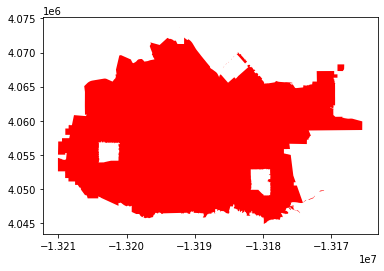

In [391]:
val_bureau_df=measures[measures['Divisions']=='Valley Bureau']
boundary_val = gpd.GeoSeries(cascaded_union(val_bureau_df['geometry']))
boundary_val.plot(color = 'red')
plt.show()

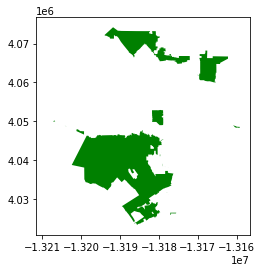

In [392]:
west_div_df=measures[measures['Divisions']=='West and Pacific']

boundary_west = gpd.GeoSeries(cascaded_union(west_div_df['geometry']))
boundary_west.plot(color = 'green')
plt.show()

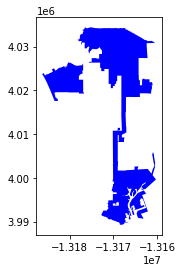

In [393]:
south_bureau_df=measures[measures['Divisions']=='South Bureau']
boundary_south = gpd.GeoSeries(cascaded_union(south_bureau_df['geometry']))
boundary_south.plot(color = 'blue')
plt.show()

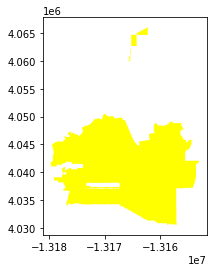

In [394]:
central_bureau_df=measures[measures['Divisions']=='Central Bureau']
boundary_central = gpd.GeoSeries(cascaded_union(central_bureau_df['geometry']))
boundary_central.plot(color = 'yellow')
plt.show()

In [395]:
def geometry(x):
    if x == 'Central Bureau':
        return(boundary_central)
    if x == 'South Bureau':
        return(boundary_south)
    if x == 'Valley Bureau':
        return(boundary_val)
    if x == 'West and Pacific':
        return(boundary_west)

In [285]:
measures.dropna(inplace=True)


In [286]:
measures[measures['Divisions'].isnull()==True]

,FID,zipcode,Rank,Neighborho,IRS_Ratio,HH_Size,Per_White,Per_Colleg,Rent,Index_Scor,IRS_Rati_1,IRS_Rati_2,HH_Incom_2,HH_Size_20,HH_Size_21,Percent_Wh,Percent__1,College_Pe,College__1,Gross_Rent,Gross_Re_1,MedInc4,HHChangAdj,Population,Populati_1,Populati_2,Evaluated,SHAPE_Length,SHAPE_Area,geometry,Divisions


In [287]:
measures['geometry']=measures['Divisions'].apply(geometry)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1321: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [380]:
measures_divisions = gpd.GeoDataFrame(measures, crs={'init': 'epsg:4326'}, geometry = measures['geometry'])

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [289]:
measures_divisions.head()

,FID,zipcode,Rank,Neighborho,IRS_Ratio,HH_Size,Per_White,Per_Colleg,Rent,Index_Scor,IRS_Rati_1,IRS_Rati_2,HH_Incom_2,HH_Size_20,HH_Size_21,Percent_Wh,Percent__1,College_Pe,College__1,Gross_Rent,Gross_Re_1,MedInc4,HHChangAdj,Population,Populati_1,Populati_2,Evaluated,SHAPE_Length,SHAPE_Area,geometry,Divisions
0,1,90001,37,Florence,-47.007,-2.759,-0.086,1.561,24.858,0.389561,24.339,12.898,34050,4.35,4.23,0.78,0.69,2.41,3.97,781,975,33279.05739,2.316600,54481,56314,3.4,Yes,0.087079,0.000235,"MULTIPOLYGON (((-13162822.928 3996840.667, -13...",South Bureau
1,2,90002,57,Watts/Green Meadows,-44.965,1.683,0.346,1.309,25.733,0.359525,27.413,15.087,30214,4.16,4.23,0.47,0.81,3.00,4.31,770,968,31443.73944,-3.910920,44584,50098,12.4,Yes,0.155066,0.000517,"MULTIPOLYGON (((-13162822.928 3996840.667, -13...",South Bureau
2,3,90003,33,Florence/Broadway-Manchester,-41.524,3.000,-0.182,2.798,35.303,0.402008,31.808,18.600,30016,4.00,4.12,0.68,0.49,3.30,6.09,786,1064,30720.61042,-2.293608,58187,66913,15.0,Yes,0.186812,0.000930,"MULTIPOLYGON (((-13162822.928 3996840.667, -13...",South Bureau
3,4,90004,15,East Hollywood/Larchmont/Windsor Square,-32.379,-6.873,3.060,11.296,29.716,0.483000,2.338,1.581,38493,2.91,2.71,14.30,17.36,22.30,33.59,825,1070,37931.27907,1.480891,67850,63547,-6.3,Yes,0.163615,0.000762,"MULTIPOLYGON (((-13157111.090 4032606.192, -13...",Central Bureau
4,5,90005,20,Koreatown/Mid-Wilshire,-41.123,-8.214,0.934,7.120,24.864,0.460000,4.074,2.399,31214,2.80,2.57,7.56,8.49,19.03,26.15,752,939,30242.19046,3.213423,43014,38638,-10.2,Yes,0.279436,0.000335,"MULTIPOLYGON (((-13157111.090 4032606.192, -13...",Central Bureau


In [290]:
divisions=measures_divisions.groupby("Divisions",as_index=False)["Population"].sum()

In [291]:
divisions['geometry']=divisions['Divisions'].apply(geometry)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1321: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [292]:
divisions_with_population = gpd.GeoDataFrame(divisions, crs={'init': 'epsg:4326'}, geometry = divisions['geometry'])

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [293]:
divisions_with_population

,Divisions,Population,geometry
0,Central Bureau,1377466,"MULTIPOLYGON (((-13157111.090 4032606.192, -13..."
1,South Bureau,1663180,"MULTIPOLYGON (((-13162822.928 3996840.667, -13..."
2,Valley Bureau,1324966,"MULTIPOLYGON (((-13175506.909 4047534.523, -13..."
3,West and Pacific,757173,"MULTIPOLYGON (((-13186047.065 4023837.559, -13..."


In [294]:
divisions.to_file("/content/drive/MyDrive/Data Management and Visualization Project/Data Management/Variety/Built Data/macro_divisions.geojson", driver='GeoJSON')

AttributeError: ignored

In [ ]:
#we merged the number of calls dataset with dataset of LAPD districts in order to obtain the FID number 
#associated to each district

In [ ]:
#since the dataset LAPD CALLS FOR SERVICE has not the district's number, we merged it with divisions dataset 
#on "Area Occurred" (LAPD Calls for Service) and on "APREC" (divisions)

In [295]:
#this dataset is used as reference table in order to have the number of the district
divisions=pd.read_csv("/content/drive/MyDrive/Data Management and Visualization Project/Data/LAPD_Divisions.csv")
divisions

,FID,APREC,PREC,AREA,PERIMETER,SHAPE_Length,SHAPE_Area
0,1,MISSION,19,6.995826e+08,190817.495739,0.576177,0.006363
1,2,DEVONSHIRE,17,1.346816e+09,175591.702871,0.534007,0.012249
2,3,FOOTHILL,16,1.297385e+09,203717.879169,0.627755,0.011797
3,4,TOPANGA,21,9.090326e+08,155505.795458,0.470165,0.008260
4,5,WEST VALLEY,10,9.364057e+08,136316.899694,0.407795,0.008507
5,6,NORTH HOLLYWOOD,15,6.346011e+08,187366.252732,0.566582,0.005765
6,7,VAN NUYS,9,4.896950e+08,116288.308461,0.347249,0.004449
7,8,NORTHEAST,11,8.156022e+08,178460.722082,0.541347,0.007404
8,9,HOLLYWOOD,6,3.718353e+08,115808.747099,0.353721,0.003375
9,10,WEST LOS ANGELES,8,1.803659e+09,295206.415546,0.897951,0.016368


In [296]:
#reading csv
calls = pd.read_csv("/content/drive/MyDrive/Data Management and Visualization Project/Data/LAPD_Calls_for_Service_2016.csv")
calls


,Incident Number,Reporting District,Area Occurred,Dispatch Date,Dispatch Time,Call Type Code,Call Type Description
0,161031000621,1321,Newton,10/31/2016,04:57:44,9212,TRESPASS SUSP
1,161031000620,396,Southwest,10/31/2016,04:55:22,459X,I/P
2,161031000600,2029,Olympic,10/31/2016,04:54:49,906B1,CODE 30 RINGER
3,161031000556,1008,West Valley,10/31/2016,04:50:22,507P,PARTY
4,161031000609,1256,77th Street,10/31/2016,04:45:49,620D,DOM VIOL
...,...,...,...,...,...,...,...
1016869,161222000732,521,Harbor,12/22/2016,07:27:13,9041,T/C
1016870,161117003885,1035,West Valley,11/17/2016,18:36:18,918VM,VIOLENT MALE
1016871,161222000606,1146,Northeast,12/22/2016,06:31:00,9212,TRESPASS SUSP
1016872,161226002227,585,Harbor,12/26/2016,15:37:42,921C,COMPLAINT


In [297]:
#extracting the names of the districts to make comparisons with the area in divisions dataset
calls['Area_O']=calls['Area Occurred'].copy()
calls_area=calls.groupby('Area_O',as_index=False)['Area Occurred'].count()
calls_area=calls_area[['Area_O']]

In [298]:
calls_area

,Area_O
0,77th Street
1,Central
2,Devonshire
3,Foothill
4,Harbor
5,Hollenbeck
6,Hollywood
7,Mission
8,N Hollywood
9,Newton


In [299]:
#we create lists with columns on which we're going to merge the two datasets to compare and uniform them  
calls_list=list(calls_area['Area_O'])
divisions_list=list(divisions['APREC'])


In [300]:
#we sorted in alphabetical orders names 
divisions_list=sorted(divisions_list)
calls_list=sorted(calls_list)

In [301]:
#we created a new dataset from the 2 lists to calculate edit distance among them
distance= pd.DataFrame({'Area Occurred':calls_list, 'APREC': divisions_list })
distance

,Area Occurred,APREC
0,77th Street,77TH STREET
1,Central,CENTRAL
2,Devonshire,DEVONSHIRE
3,Foothill,FOOTHILL
4,Harbor,HARBOR
5,Hollenbeck,HOLLENBECK
6,Hollywood,HOLLYWOOD
7,Mission,MISSION
8,N Hollywood,NEWTON
9,Newton,NORTH HOLLYWOOD


In [302]:
#calculating edit distance 1
distance['distance_1'] = distance.apply(lambda x: edit_distance(x["APREC"], x["Area Occurred"]), axis=1)

In [303]:
distance

,Area Occurred,APREC,distance_1
0,77th Street,77TH STREET,7
1,Central,CENTRAL,6
2,Devonshire,DEVONSHIRE,9
3,Foothill,FOOTHILL,7
4,Harbor,HARBOR,5
5,Hollenbeck,HOLLENBECK,9
6,Hollywood,HOLLYWOOD,8
7,Mission,MISSION,6
8,N Hollywood,NEWTON,10
9,Newton,NORTH HOLLYWOOD,14


In [304]:
#we have lowered APREC strings to minimize edit distance
distance['APREC']=distance['APREC'].str.lower()

In [305]:
#we calculated edit distance again
distance['distance_2'] = distance.apply(lambda x: edit_distance(x["APREC"], x["Area Occurred"]), axis=1)
distance

,Area Occurred,APREC,distance_1,distance_2
0,77th Street,77th street,7,1
1,Central,central,6,1
2,Devonshire,devonshire,9,1
3,Foothill,foothill,7,1
4,Harbor,harbor,5,1
5,Hollenbeck,hollenbeck,9,1
6,Hollywood,hollywood,8,1
7,Mission,mission,6,1
8,N Hollywood,newton,10,9
9,Newton,north hollywood,14,13


In [306]:
#we have lowered Area Occurred strings to minimize more edit distance
distance['Area Occurred']=distance['Area Occurred'].str.lower()

In [307]:
#we calculated edit distance again
distance['distance_3'] = distance.apply(lambda x: edit_distance(x["APREC"], x["Area Occurred"]), axis=1)
distance

,Area Occurred,APREC,distance_1,distance_2,distance_3
0,77th street,77th street,7,1,0
1,central,central,6,1,0
2,devonshire,devonshire,9,1,0
3,foothill,foothill,7,1,0
4,harbor,harbor,5,1,0
5,hollenbeck,hollenbeck,9,1,0
6,hollywood,hollywood,8,1,0
7,mission,mission,6,1,0
8,n hollywood,newton,10,9,8
9,newton,north hollywood,14,13,12


In [ ]:
#Only two values needed to be treated 
#In order to uniform names of the districts we take the "Area Occurred" column and we substitute:
#n hollywood -> north hollywood
#west la -> west los angeles

In [308]:
calls

,Incident Number,Reporting District,Area Occurred,Dispatch Date,Dispatch Time,Call Type Code,Call Type Description,Area_O
0,161031000621,1321,Newton,10/31/2016,04:57:44,9212,TRESPASS SUSP,Newton
1,161031000620,396,Southwest,10/31/2016,04:55:22,459X,I/P,Southwest
2,161031000600,2029,Olympic,10/31/2016,04:54:49,906B1,CODE 30 RINGER,Olympic
3,161031000556,1008,West Valley,10/31/2016,04:50:22,507P,PARTY,West Valley
4,161031000609,1256,77th Street,10/31/2016,04:45:49,620D,DOM VIOL,77th Street
...,...,...,...,...,...,...,...,...
1016869,161222000732,521,Harbor,12/22/2016,07:27:13,9041,T/C,Harbor
1016870,161117003885,1035,West Valley,11/17/2016,18:36:18,918VM,VIOLENT MALE,West Valley
1016871,161222000606,1146,Northeast,12/22/2016,06:31:00,9212,TRESPASS SUSP,Northeast
1016872,161226002227,585,Harbor,12/26/2016,15:37:42,921C,COMPLAINT,Harbor


In [309]:
#making corrections to the original datasets 
divisions['APREC']=divisions['APREC'].str.lower()
divisions

,FID,APREC,PREC,AREA,PERIMETER,SHAPE_Length,SHAPE_Area
0,1,mission,19,6.995826e+08,190817.495739,0.576177,0.006363
1,2,devonshire,17,1.346816e+09,175591.702871,0.534007,0.012249
2,3,foothill,16,1.297385e+09,203717.879169,0.627755,0.011797
3,4,topanga,21,9.090326e+08,155505.795458,0.470165,0.008260
4,5,west valley,10,9.364057e+08,136316.899694,0.407795,0.008507
5,6,north hollywood,15,6.346011e+08,187366.252732,0.566582,0.005765
6,7,van nuys,9,4.896950e+08,116288.308461,0.347249,0.004449
7,8,northeast,11,8.156022e+08,178460.722082,0.541347,0.007404
8,9,hollywood,6,3.718353e+08,115808.747099,0.353721,0.003375
9,10,west los angeles,8,1.803659e+09,295206.415546,0.897951,0.016368


In [310]:
#adjusting names to uniform them with divisions datasets
calls['Area Occurred']=calls['Area Occurred'].str.lower()
calls['Area Occurred']=calls['Area Occurred'].replace('n hollywood','north hollywood')
calls['Area Occurred']=calls['Area Occurred'].replace('west la','west los angeles')


In [311]:
#Table's Completeness

calls.isna().sum() #none of the value in the dataset are NaN


Incident Number          0
Reporting District       0
Area Occurred            0
Dispatch Date            0
Dispatch Time            0
Call Type Code           0
Call Type Description    0
Area_O                   0
dtype: int64

In [356]:
calls_with_districts= pd.merge(calls,divisions, left_on="Area Occurred",right_on="APREC")
calls_with_districts=calls_with_districts.rename(columns={'PREC':'Districts_number'})

In [357]:
calls_with_districts

,Incident Number,Reporting District,Area Occurred,Dispatch Date,Dispatch Time,Call Type Code,Call Type Description,Area_O,FID,APREC,Districts_number,AREA,PERIMETER,SHAPE_Length,SHAPE_Area
0,161031000621,1321,newton,10/31/2016,04:57:44,9212,TRESPASS SUSP,Newton,16,newton,13,2.723760e+08,81476.922847,0.241128,0.002470
1,161031000524,1309,newton,10/31/2016,03:51:08,9212N,TRESPASS SUSP NOW,Newton,16,newton,13,2.723760e+08,81476.922847,0.241128,0.002470
2,161031000501,1313,newton,10/31/2016,03:32:12,921C,COMPLAINT,Newton,16,newton,13,2.723760e+08,81476.922847,0.241128,0.002470
3,161031000511,1333,newton,10/31/2016,03:28:50,459X,I/P,Newton,16,newton,13,2.723760e+08,81476.922847,0.241128,0.002470
4,161031000507,1313,newton,10/31/2016,03:25:35,415M,MAN,Newton,16,newton,13,2.723760e+08,81476.922847,0.241128,0.002470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016869,161213005556,937,van nuys,12/13/2016,23:58:59,245FJ,SHOTS FIRED J/O,Van Nuys,7,van nuys,9,4.896950e+08,116288.308461,0.347249,0.004449
1016870,161221005487,941,van nuys,12/21/2016,23:48:48,620D,DOM VIOL,Van Nuys,7,van nuys,9,4.896950e+08,116288.308461,0.347249,0.004449
1016871,161209001139,911,van nuys,12/09/2016,08:34:49,415G,GRP,Van Nuys,7,van nuys,9,4.896950e+08,116288.308461,0.347249,0.004449
1016872,161218003427,964,van nuys,12/18/2016,18:15:16,921C,COMPLAINT,Van Nuys,7,van nuys,9,4.896950e+08,116288.308461,0.347249,0.004449


In [ ]:
#creating a list with the FID number associated to each division 

In [358]:
south_bureau=[15,20,18,19]

In [359]:
valley_bureau=[1,2,3,4,5,6,7]

In [360]:
west_division=[9,13,10,17,14]

In [361]:
central_bureau=[16,8,12,11,21]

In [362]:
calls_with_districts['Divisions']=calls_with_districts['FID'].apply(create)

In [363]:
calls_with_districts['Divisions']

0          Central Bureau
1          Central Bureau
2          Central Bureau
3          Central Bureau
4          Central Bureau
                ...      
1016869     Valley Bureau
1016870     Valley Bureau
1016871     Valley Bureau
1016872     Valley Bureau
1016873     Valley Bureau
Name: Divisions, Length: 1016874, dtype: object

In [ ]:
#we filtered crimes related to street and assault on public means, because the calls acquired from Broadcastify are related 
#to this kind of crimes

In [364]:
Traffic_problems=['POSS GTA','TRAFFIC STOP', 'GTA J/O','AMB OVERTURNED VEH', 'AMB DUI', 'POSS GTA SUSP', 'GTA', 'W/VEH SUSP', 'BICYCLIST INVOLVED', 'AUTO REPAIR', 'CZN HLDG GTA', 'VEH ALARM', 'GTA SUSP J/L', 'GTA SUSP NOW','GTA SUSP', 'ATT GTA', 'GTA INVEST', 'W/VEH SUSP NOW','W/VEH SUSP J/L','AMB GTA', 'POSS CAR STRIP SUSP','W/VEH', 'W/VEH J/O','MAN/WMN IN VEH', 'ATTEMPT W/VEH','W/VEH INVEST', 'UNKNOWN TROUBLE BUS', 'TRAFFIC BICYCLIST IN','AMB GTA J/O', 'POSS ATT GTA', 'ATT GTA J/O','CAR STRIP SUSP J/L', 'CAR STRIP','ATT CAR STRIP SUSP','W/VEH JUST LEFT', 'AMB RAILROAD','MAN ON A BUS', 'POSS GTA J/O', 'WINDOW SMASH J/O', 'VEHICLE','AMB GTA SUSP','MTA BUS', 'OVERTURNED VEH', 'AMB GTA SHOTS FIRED', 'TRAFFIC', 'W/VEH HATE CRIME INV', 'OFCR HLDG GTA', 'CZN HLDG ATT GTA', 'I/P W/ VEH', 'GTA SHOTS FIRED J/O', 'CZN HLDG POSS GTA', 'OFCR HLDG ATT GTA']

In [365]:
calls_with_districts=calls_with_districts[calls_with_districts['Call Type Description'].isin(Traffic_problems)==True]

In [ ]:
#In order to compare the integrated dataset and the dataset obtained with scraping we need to group by on dates and divisions

In [366]:
calls_with_districts.columns

Index(['Incident Number', 'Reporting District', 'Area Occurred',
       'Dispatch Date', 'Dispatch Time', 'Call Type Code',
       'Call Type Description', 'Area_O', 'FID', 'APREC', 'Districts_number',
       'AREA', 'PERIMETER', 'SHAPE_Length', 'SHAPE_Area', 'Divisions'],
      dtype='object')

In [367]:
#transforming in datetime to uniform dates
calls_with_districts['Dispatch Date']=pd.to_datetime(calls_with_districts['Dispatch Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [368]:
calls_with_districts=calls_with_districts.groupby(["Divisions","Dispatch Date"], as_index=False).FID.count()

In [377]:
calls_with_districts

,Divisions,Dispatch Date,FID
0,Central Bureau,2016-01-01,16
1,Central Bureau,2016-01-02,7
2,Central Bureau,2016-01-03,6
3,Central Bureau,2016-01-04,12
4,Central Bureau,2016-01-05,7
...,...,...,...
1459,West and Pacific,2016-12-27,25
1460,West and Pacific,2016-12-28,21
1461,West and Pacific,2016-12-29,16
1462,West and Pacific,2016-12-30,11


In [387]:
#renaming
calls_per_districts=calls_with_districts.rename(columns={'FID':'number_of_calls'})

In [388]:
calls_per_districts

,Divisions,Dispatch Date,number_of_calls
0,Central Bureau,2016-01-01,16
1,Central Bureau,2016-01-02,7
2,Central Bureau,2016-01-03,6
3,Central Bureau,2016-01-04,12
4,Central Bureau,2016-01-05,7
...,...,...,...
1459,West and Pacific,2016-12-27,25
1460,West and Pacific,2016-12-28,21
1461,West and Pacific,2016-12-29,16
1462,West and Pacific,2016-12-30,11


In [396]:
calls_per_districts["geometry"]=calls_per_districts["Divisions"].apply(geometry)

In [397]:
calls_per_districts

,Divisions,Dispatch Date,number_of_calls,geometry
0,Central Bureau,2016-01-01,16,(POLYGON ((-13157111.08977128 4032606.19223732...
1,Central Bureau,2016-01-02,7,(POLYGON ((-13157111.08977128 4032606.19223732...
2,Central Bureau,2016-01-03,6,(POLYGON ((-13157111.08977128 4032606.19223732...
3,Central Bureau,2016-01-04,12,(POLYGON ((-13157111.08977128 4032606.19223732...
4,Central Bureau,2016-01-05,7,(POLYGON ((-13157111.08977128 4032606.19223732...
...,...,...,...,...
1459,West and Pacific,2016-12-27,25,(POLYGON ((-13186047.06465618 4023837.55878507...
1460,West and Pacific,2016-12-28,21,(POLYGON ((-13186047.06465618 4023837.55878507...
1461,West and Pacific,2016-12-29,16,(POLYGON ((-13186047.06465618 4023837.55878507...
1462,West and Pacific,2016-12-30,11,(POLYGON ((-13186047.06465618 4023837.55878507...


In [398]:
calls_per_districts=gpd.GeoDataFrame(calls_per_districts, crs={'init': 'epsg:4326'}, geometry = calls_per_districts['geometry'])

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:
calls_per_districts.to_file("/content/drive/MyDrive/Data Management and Visualization Project/Data Management/Variety/Built Data/calls_2016.geojson", driver='GeoJSON')